In [1]:
import os
os.getcwd()

'/Users/combattant/Desktop/NHS Files'

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import glob

# Path to  folder 
folder_path = '/Users/combattant/Desktop/NHS Files/'

# Get all CSV files in the folder
files = glob.glob(folder_path + "*.csv")

print("Files found:", files)   # Debugging 

# Create an empty list to store data
all_data = []

# Loop through each file
for file in files:
    df = pd.read_csv(file)
    
    # Add a Period column if not already there
    if "Period" not in df.columns:
        # Extract period from filename safely
        period = file.split("-")[2] + "-" + file.split("-")[3].replace(".csv", "")
        df["Period"] = period
    
    all_data.append(df)

# Combine into one big DataFrame
df_all = pd.concat(all_data, ignore_index=True)

# Quick check
print("Shape of combined dataset:", df_all.shape)
print("Unique periods:", df_all["Period"].unique())

Files found: ['/Users/combattant/Desktop/NHS Files/20250630-RTT-June-2025-full-extract.csv', '/Users/combattant/Desktop/NHS Files/nhs_waiting_summary_mysql.csv', '/Users/combattant/Desktop/NHS Files/nhs_waiting_summary_clean.csv', '/Users/combattant/Desktop/NHS Files/20250531-RTT-May-2025-full-extract.csv', '/Users/combattant/Desktop/NHS Files/20250731-RTT-July-2025-full-extract.csv', '/Users/combattant/Desktop/NHS Files/20250430-RTT-April-2025-full-extract.csv', '/Users/combattant/Desktop/NHS Files/nhs_waiting_summary.csv', '/Users/combattant/Desktop/NHS Files/NHS_waiting_times_cleaned.csv']
Shape of combined dataset: (769512, 123)
Unique periods: ['RTT-June-2025' 'RTT-April-2025' 'RTT-July-2025' 'RTT-May-2025'
 '2025-04-01' '2025-07-01' '2025-06-01' '2025-05-01']


In [5]:
df_all.head()

,Period,Provider Parent Org Code,Provider Parent Name,Provider Org Code,Provider Org Name,Commissioner Parent Org Code,Commissioner Parent Name,Commissioner Org Code,Commissioner Org Name,RTT Part Type,...,Gt 100 To 101 Weeks SUM 1,Gt 101 To 102 Weeks SUM 1,Gt 102 To 103 Weeks SUM 1,Gt 103 To 104 Weeks SUM 1,Gt 104 Weeks SUM 1,Total,Patients with unknown clock start date,Total All,WaitCategory,Patients
0,RTT-June-2025,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,A4M8P,BUCKSHAW HOSPITAL,NaN,NaN,13Q,NATIONAL COMMISSIONING HUB 1,Part_1B,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN
1,RTT-June-2025,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,A4M8P,BUCKSHAW HOSPITAL,NaN,NaN,13Q,NATIONAL COMMISSIONING HUB 1,Part_1B,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN
2,RTT-June-2025,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,A4M8P,BUCKSHAW HOSPITAL,NaN,NaN,13Q,NATIONAL COMMISSIONING HUB 1,Part_2,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN
3,RTT-June-2025,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,A4M8P,BUCKSHAW HOSPITAL,NaN,NaN,13Q,NATIONAL COMMISSIONING HUB 1,Part_2,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN
4,RTT-June-2025,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,A4M8P,BUCKSHAW HOSPITAL,NaN,NaN,32T,NORTH WEST - H&J COMMISSIONING HUB,Part_2,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN


In [6]:
df_all["Period"].unique()

array(['RTT-June-2025', 'RTT-April-2025', 'RTT-July-2025', 'RTT-May-2025',
       '2025-04-01', '2025-07-01', '2025-06-01', '2025-05-01'],
      dtype=object)

In [7]:
print(df_all.duplicated().sum())

11316


In [8]:
# Keep Provider + Period + all wait time columns
useful_cols = ["Period", "Provider Org Name"] + [c for c in df_all.columns if "Weeks" in c]
df_small = df_all[useful_cols]

# Melt into long format
df_long = df_small.melt(
    id_vars=["Period", "Provider Org Name"],
    var_name="WaitBand",
    value_name="Patients"
)

df_long.head()

,Period,Provider Org Name,WaitBand,Patients
0,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks SUM 1,0.0
1,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks SUM 1,0.0
2,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks SUM 1,0.0
3,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks SUM 1,0.0
4,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks SUM 1,0.0


In [12]:
# Clean WaitBand text
df_long["WaitBand"] = df_long["WaitBand"].str.replace("SUM 1", "", regex=False).str.strip()


In [16]:
df_long.isna().sum()

Period                      0
Provider Org Name           0
WaitBand                    0
Patients             27335830
dtype: int64

In [15]:
df_long[df_long.isna().any(axis = 1)] # any(axis=1) to select the rows with missing values

,Period,Provider Org Name,WaitBand,Patients
29,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks,NaN
30,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks,NaN
31,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks,NaN
32,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks,NaN
33,RTT-June-2025,BUCKSHAW HOSPITAL,Gt 00 To 01 Weeks,NaN
...,...,...,...,...
80798755,2025-05-01,WYE VALLEY NHS TRUST,Gt 104 Weeks,NaN
80798756,2025-05-01,YORK AND SCARBOROUGH TEACHING HOSPITALS NHS FO...,Gt 104 Weeks,NaN
80798757,2025-05-01,YORK AND SCARBOROUGH TEACHING HOSPITALS NHS FO...,Gt 104 Weeks,NaN
80798758,2025-05-01,YORK AND SCARBOROUGH TEACHING HOSPITALS NHS FO...,Gt 104 Weeks,NaN


NaN values in Patients do not mean missing data but rather no patients reported in that category. For analysis, I replaced NaN with 0 so that totals are correct and no providers/wait bands are lost. Dropping would bias results, and keeping NaN would break Power BI aggregations.”

In [17]:
# Fill missing patients with 0

df_long['Patients']=df_long['Patients'].fillna(0)
print(df_long.isna().sum())

Period               0
Provider Org Name    0
WaitBand             0
Patients             0
dtype: int64


In [12]:
## Explanatory Analysis

#### Total patients by provider

In [18]:
df_provider = df_long.groupby("Provider Org Name") ["Patients"].sum().reset_index()

df_provider = df_provider.sort_values("Patients", ascending=False).head(10)

print(df_provider)

                                     Provider Org Name   Patients
134         MANCHESTER UNIVERSITY NHS FOUNDATION TRUST  2032806.0
141           MID AND SOUTH ESSEX NHS FOUNDATION TRUST  1731802.0
276             ROYAL FREE LONDON NHS FOUNDATION TRUST  1432694.0
197        NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST  1405700.0
9                               BARTS HEALTH NHS TRUST  1383074.0
89           GUY'S AND ST THOMAS' NHS FOUNDATION TRUST  1319728.0
458   UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST  1250928.0
454        UNIVERSITY HOSPITALS OF LEICESTER NHS TRUST  1177906.0
453  UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS F...  1111262.0
449  UNIVERSITY HOSPITALS BIRMINGHAM NHS FOUNDATION...  1060648.0


In [19]:
# Total patients per wait band
waitband_summary = df_long.groupby("WaitBand")["Patients"].sum().reset_index().sort_values(by="Patients", ascending=False)

# Top 10 hospitals by total patient count
hospital_summary = df_long.groupby("Provider Org Name")["Patients"].sum().reset_index().sort_values(by="Patients", ascending=False).head(10)

# Average patients per hospital
hospital_avg = df_long.groupby("Provider Org Name")["Patients"].mean().reset_index().sort_values(by="Patients", ascending=False).head(10)

In [20]:
waitband_summary

,WaitBand,Patients
0,Gt 00 To 01 Weeks,4740890.0
1,Gt 01 To 02 Weeks,4031378.0
2,Gt 02 To 03 Weeks,3965614.0
3,Gt 03 To 04 Weeks,3552758.0
4,Gt 04 To 05 Weeks,3299458.0
...,...,...
101,Gt 96 To 97 Weeks,644.0
102,Gt 97 To 98 Weeks,636.0
11,Gt 100 To 101 Weeks,620.0
104,Gt 99 To 100 Weeks,586.0


In [21]:
hospital_summary

,Provider Org Name,Patients
134,MANCHESTER UNIVERSITY NHS FOUNDATION TRUST,2032806.0
141,MID AND SOUTH ESSEX NHS FOUNDATION TRUST,1731802.0
276,ROYAL FREE LONDON NHS FOUNDATION TRUST,1432694.0
197,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,1405700.0
9,BARTS HEALTH NHS TRUST,1383074.0
89,GUY'S AND ST THOMAS' NHS FOUNDATION TRUST,1319728.0
458,UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST,1250928.0
454,UNIVERSITY HOSPITALS OF LEICESTER NHS TRUST,1177906.0
453,UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS F...,1111262.0
449,UNIVERSITY HOSPITALS BIRMINGHAM NHS FOUNDATION...,1060648.0


In [22]:
hospital_avg 

,Provider Org Name,Patients
411,SUSSEX COMMUNITY DERMATOLOGY SERVICE,11.619424
46,COMMUNITAS CLINICS,11.486429
457,UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,4.753791
48,CONNECT HEALTH LIMITED,4.198593
292,SIRONA CARE & HEALTH,3.944073
110,KENT COMMUNITY HEALTH NHS FOUNDATION TRUST,3.713905
18,BIRMINGHAM COMMUNITY HEALTHCARE NHS FOUNDATION...,3.508162
262,PRIMARY INTEGRATED COMMUNITY SERVICES LTD,3.155844
412,SUSSEX COMMUNITY NHS FOUNDATION TRUST,3.037077
108,ISLE OF WIGHT NHS TRUST,2.810750


In [ ]:
# Create simplified categories
def categorize_waitband(wb):
    
    if "00 To" in wb or "01 To" in wb or "02 To" in wb or "18 Weeks" in wb:
        return "0–18 Weeks"
    elif "19 To" in wb or "20 To" in wb or "52 Weeks" in wb:
        return "18–52 Weeks"
    elif "53 Weeks" in wb or "104 Weeks" in wb or "Gt 104" in wb:
        return "52+ Weeks"
    else:
        return "Other"
        

df_long["WaitCategory"] = df_long["WaitBand"].apply(categorize_waitband)

# Group and plot
summary = df_long.groupby("WaitCategory")["Patients"].sum().reset_index()

summary.plot(kind="bar",
             x="WaitCategory", 
             y="Patients",
             color="blue", 
             figsize=(8,6))

plt.title("Total Patients by Waiting Time Band",fontsize=14, weight='bold')
plt.ylabel("Number of Patients in millions")
plt.xlabel("Waiting Time Category")
plt.show()

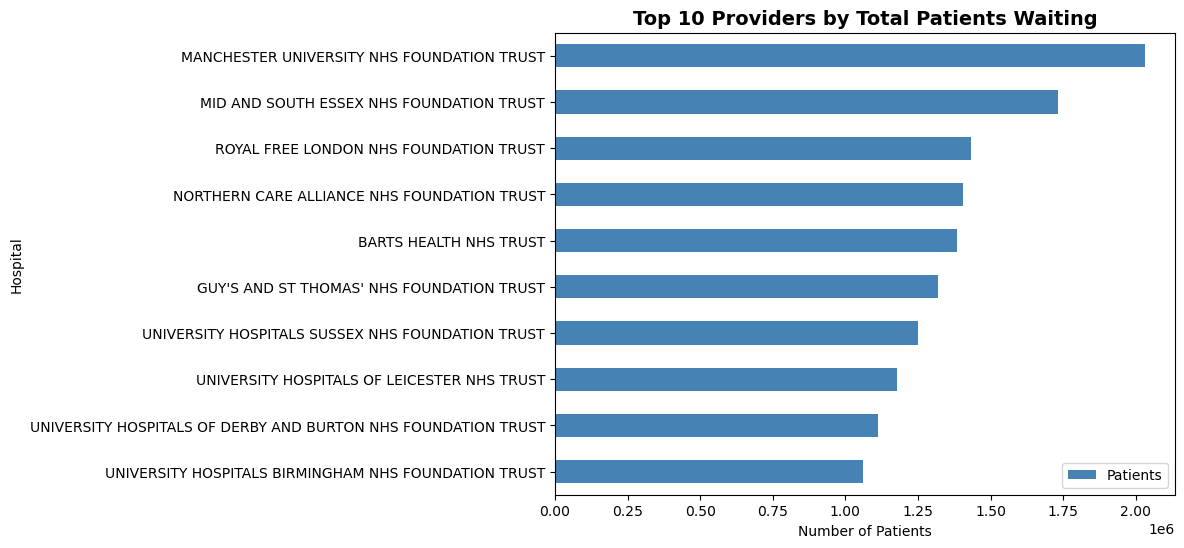

In [20]:
hospital_summary.plot(kind="barh", x="Provider Org Name", y="Patients", figsize=(8,6), color="steelblue")
plt.title("Top 10 Providers by Total Patients Waiting",fontsize=14, weight='bold')
plt.gca().invert_yaxis()   # largest at top
plt.xlabel("Number of Patients")
plt.ylabel("Hospital")
plt.show()

In [ ]:
import re

# Extract the first number that appears in WaitBand (e.g., 52 from "Gt 52 To 53 Weeks")
df_long["WaitWeeksStart"] = df_long["WaitBand"].str.extract(r'(\d+)').astype(float)
long_waits = df_long[df_long['WaitWeeksStart'] >= 52]

long_waits_summary = long_waits.groupby("Provider Org Name")["Patients"].sum().reset_index().sort_values(by="Patients", ascending=False).head(10)

long_waits_summary.plot(kind="barh", x="Provider Org Name", y="Patients", figsize=(8,6), color="olive")
plt.title("Top 10 Providers with Patients Waiting >52 Weeks",fontsize=14, weight='bold')
plt.gca().invert_yaxis()   # largest at top
plt.xlabel("Number of Patients")
plt.ylabel("Hospital")
plt.show() 

In [ ]:
# Now trend over time
trend = df_long.groupby(["Period", "WaitCategory"])["Patients"].sum().reset_index()

plt.figure(figsize=(12,6))
for cat in trend["WaitCategory"].unique():
    subset = trend[trend["WaitCategory"] == cat]
    plt.plot(subset["Period"], subset["Patients"], marker="o", label=cat)

plt.title("Trend of Patients by Waiting Time Category", fontsize=14, weight="bold")
plt.xlabel("Period")
plt.ylabel("Number of Patients")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_long.shape

In [ ]:
summary = (
    df_long.groupby(["Period", "Provider Org Name", "WaitCategory"])["Patients"]
    .sum()
    .reset_index()
)

summary

In [ ]:
import pandas as pd

file_path = "/Users/combattant/Desktop/NHS Files/nhs_waiting_summary.csv"

# Read with utf-8
df = pd.read_csv(file_path, encoding="utf-8")

# Replace special dashes and characters
df = df.replace({"–": "-"}, regex=True)   # en-dash → normal hyphen
df = df.replace({"—": "-"}, regex=True)   # em-dash → normal hyphen
df = df.replace({"’": "'"}, regex=True)   # curly apostrophe → normal '

# Save a MySQL-friendly file
clean_path = "/Users/combattant/Desktop/NHS Files/nhs_waiting_summary_mysql.csv"
df.to_csv(clean_path, index=False, encoding="utf-8")

print(f"✅ File cleaned and saved: {clean_path}")

✅ Why I aggregated the NHS dataset
	1.	File Size & Performance
	•	The raw combined dataset was ~6–7 GB with 77 million+ rows.
	•	Such a dataset is very hard to work with in SQL and Power BI, because queries become slow and dashboards unresponsive.
	•	Aggregating reduced the dataset to a manageable size without losing important insights.
	2.	Business Relevance
	•	The key questions NHS analysts (or executives) usually ask are:
	•	“How many patients are in each wait time category?”
	•	“Which providers have the most long waiters?”
	•	“How does this change over time?”
	•	These questions can be answered from aggregated data (Period, Provider, WaitCategory, Patients).
	•	Row-level patient details were not needed for high-level reporting.
	3.	Best Practice for BI/SQL Integration
	•	In industry, raw data is often too large/noisy to load directly into BI tools.
	•	It’s common practice to:
	•	Use Python for heavy data cleaning/processing,
	•	Store a summarised version in SQL for fast queries,
	•	Connect SQL → Power BI for visualisation.
	•	This demonstrates I understand ETL pipelines (Extract, Transform, Load).
	4.	Still Flexible
	•	The aggregation is at a meaningful level of granularity:
	•	Period (time dimension),
	•	Provider Org (organisation dimension),
	•	Wait Category (business KPI dimension).
	•	This allows rich trend analysis and comparison, while keeping the dataset small.

⸻

🗣️ How you can say it in an interview:

“The raw NHS data was over 77 million rows (~7 GB), which is too large to handle efficiently in SQL or Power BI.
So I used Python to clean and aggregate the dataset by Period, Provider, and Wait Category. This reduced the size drastically while keeping the key business KPIs intact.
It also reflects how ETL pipelines work in real-world data projects — raw data is processed in Python or Spark, aggregated into SQL for efficient querying, and then visualised in Power BI.”


In [ ]:
import pandas as pd 
df1 = pd.read_csv('nhs_waiting_summary_mysql.csv')

In [ ]:
df1.head()

In [ ]:
df1.isna().sum()

In [ ]:
df1['Period'] = df1['Period'].str.replace('RTT-', "") 

In [ ]:
df1.head()

In [ ]:
df1['Period'] = pd.to_datetime(df1['Period'], format='%B-%Y')

In [ ]:
df1.head()

In [ ]:
df1.to_csv('NHS_waiting_times_cleaned.csv', index=False)

In [ ]:
data = pd.read_csv('NHS_waiting_times_cleaned.csv')

In [ ]:
data.head()